# This notebook shows some basic EDA on EVE and AIA data

And also examples on how one can load our processed data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.autograd import Variable
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import glob

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:98% !important; }</style>"))

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%config InlineBackend.figure_format='retina'

plt.style.use('tableau-colorblind10')

plt.rcParams['figure.figsize']=(9,7)
plt.rcParams['font.size']=14
plt.rcParams['xtick.labelsize']=14
plt.rcParams['ytick.labelsize']=14
plt.rcParams['axes.grid']=True
plt.rcParams['axes.linewidth']=1.0
plt.rcParams['grid.alpha']=0.3
plt.rcParams['axes.spines.bottom']=False
plt.rcParams['axes.spines.left']=False
plt.rcParams['axes.spines.right']=False
plt.rcParams['axes.spines.top']=False
plt.rcParams['legend.fontsize'] = 'medium'
# plt.rcParams['axes.prop_cycle'] = plt.cycler('color',plt.cm.gist_stern(np.linspace(0,1,9)))

# EVE

In [2]:
csv_path  = '/bigdata2/SDO/csv_files'
base      = '/bigdata2/SDO/raws_resized_with_corrections'

In [3]:
eve = pd.read_csv('{}/eve.csv'.format(csv_path), index_col='date_obs')
eve.index = pd.to_datetime(eve.index)

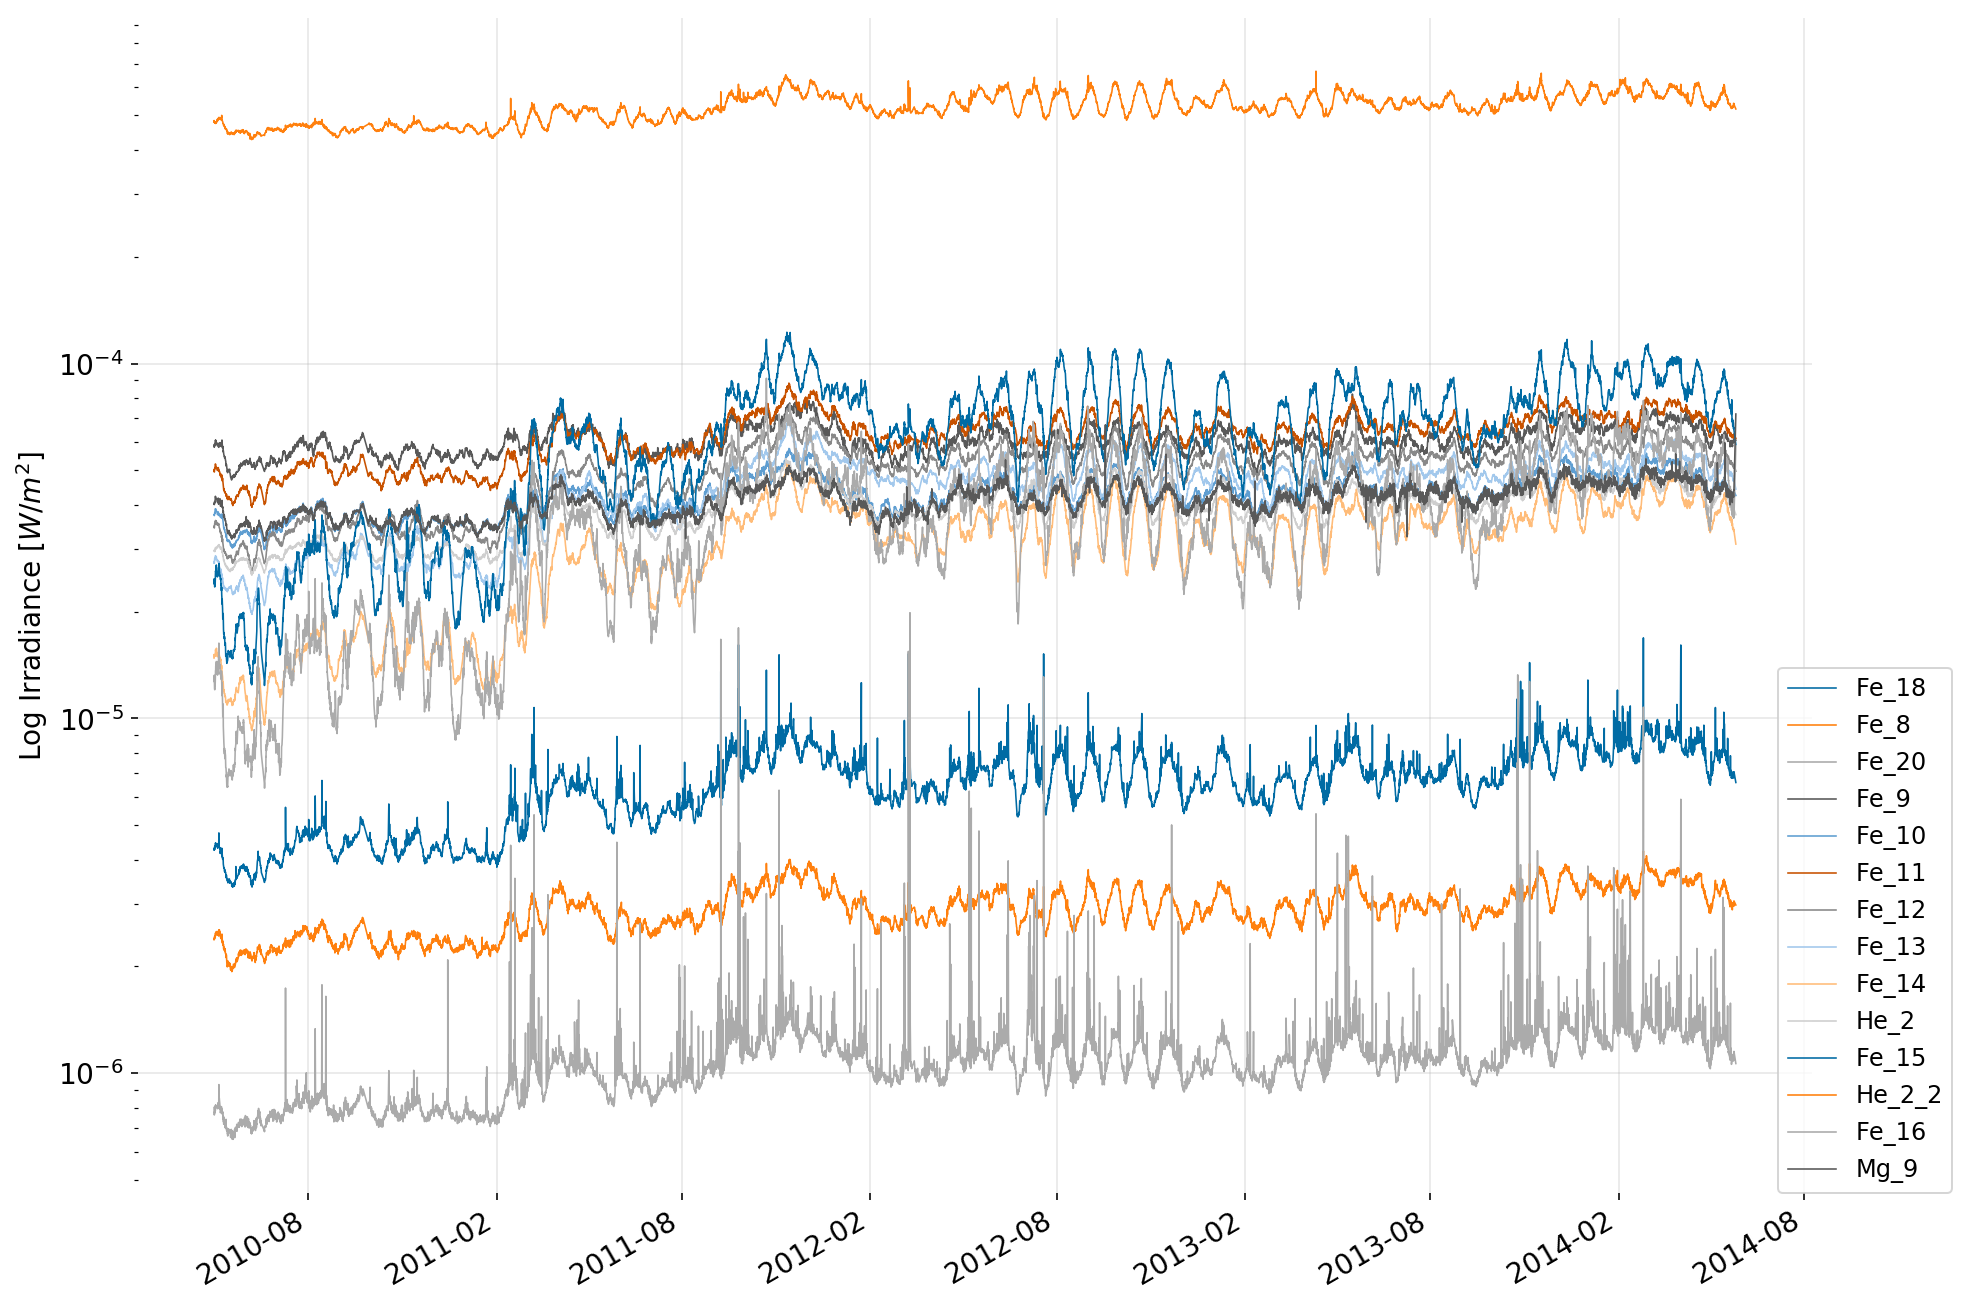

In [44]:
fig,ax = plt.subplots(figsize=(15,12))
eve.sample(10000).plot(ax=ax, alpha=1.0, lw=0.8, logy=True, legend=False)
ax.set_ylabel('Log Irradiance [$W/m^2$]', fontsize=14)
ax.set_xlabel('')
ax.grid(alpha=0.3)
ax.legend(loc=(0.98,0), fontsize=12)
plt.savefig('figures/eve.pdf')

# AIA No corrections

In [6]:
aia_means = pd.read_csv('{}/aia_means.csv'.format(csv_path),index_col='date_obs')
aia_means.index = pd.to_datetime(aia_means.index)
aia_means.columns = ['freq_' + x[1] for x in aia_means.columns.str.split('files')]

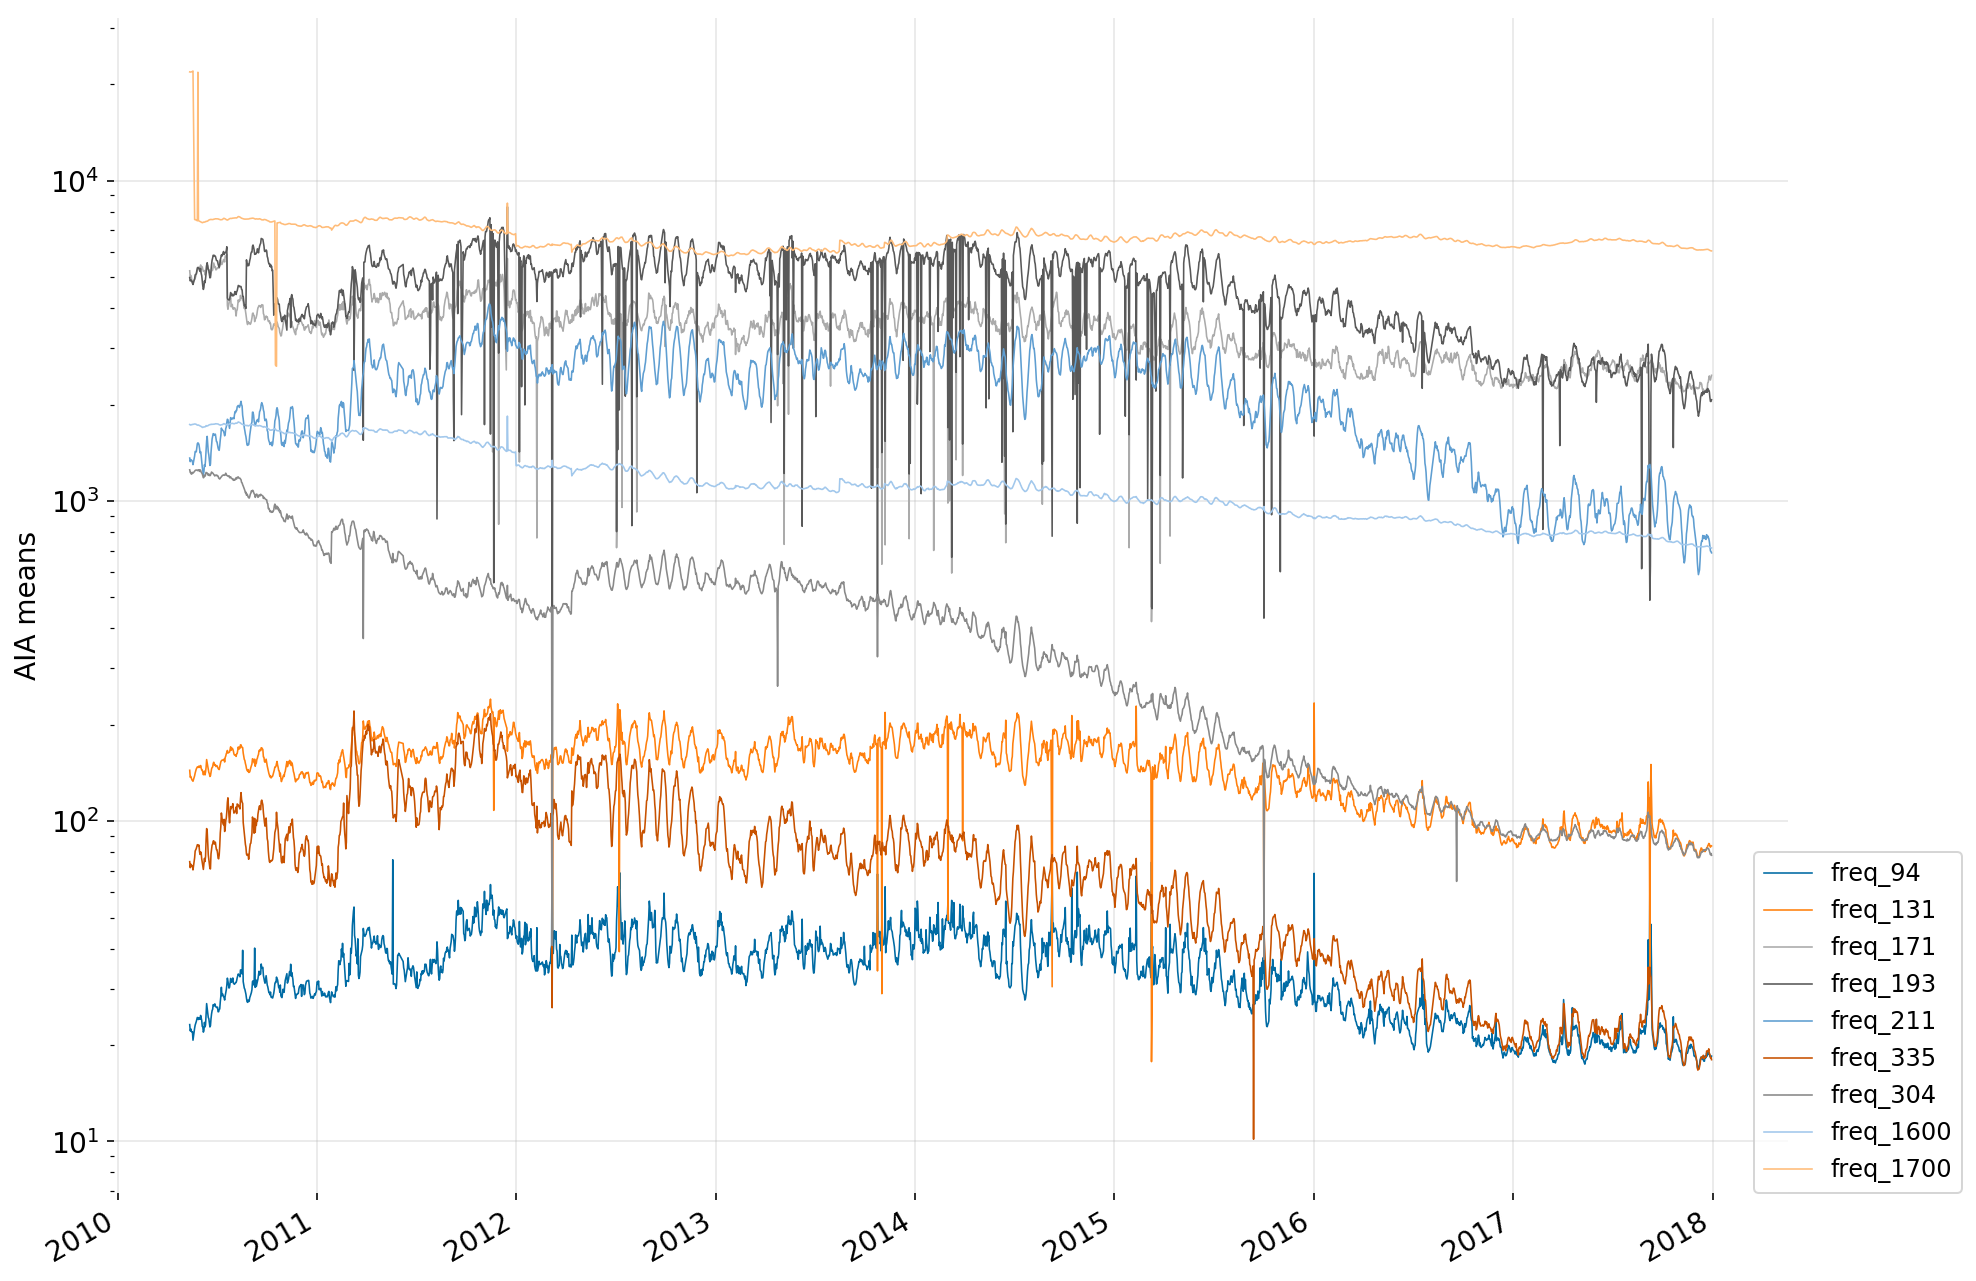

In [7]:
fig,ax = plt.subplots(figsize=(15,12))
aia_means.plot(ax=ax, alpha=1.0, lw=0.8, logy=True, legend=False)
ax.set_ylabel('AIA means', fontsize=14)
ax.set_xlabel('')
ax.grid(alpha=0.3)
ax.legend(loc=(0.98,0), fontsize=12)
plt.savefig('figures/aia_means_corrupt.pdf')

In [8]:
aia_means = pd.read_csv('{}/aia_means_with_corrections.csv'.format(csv_path),index_col='date_obs')
aia_means.index = pd.to_datetime(aia_means.index)
aia_means.columns = ['freq_' + x[1] for x in aia_means.columns.str.split('files')]

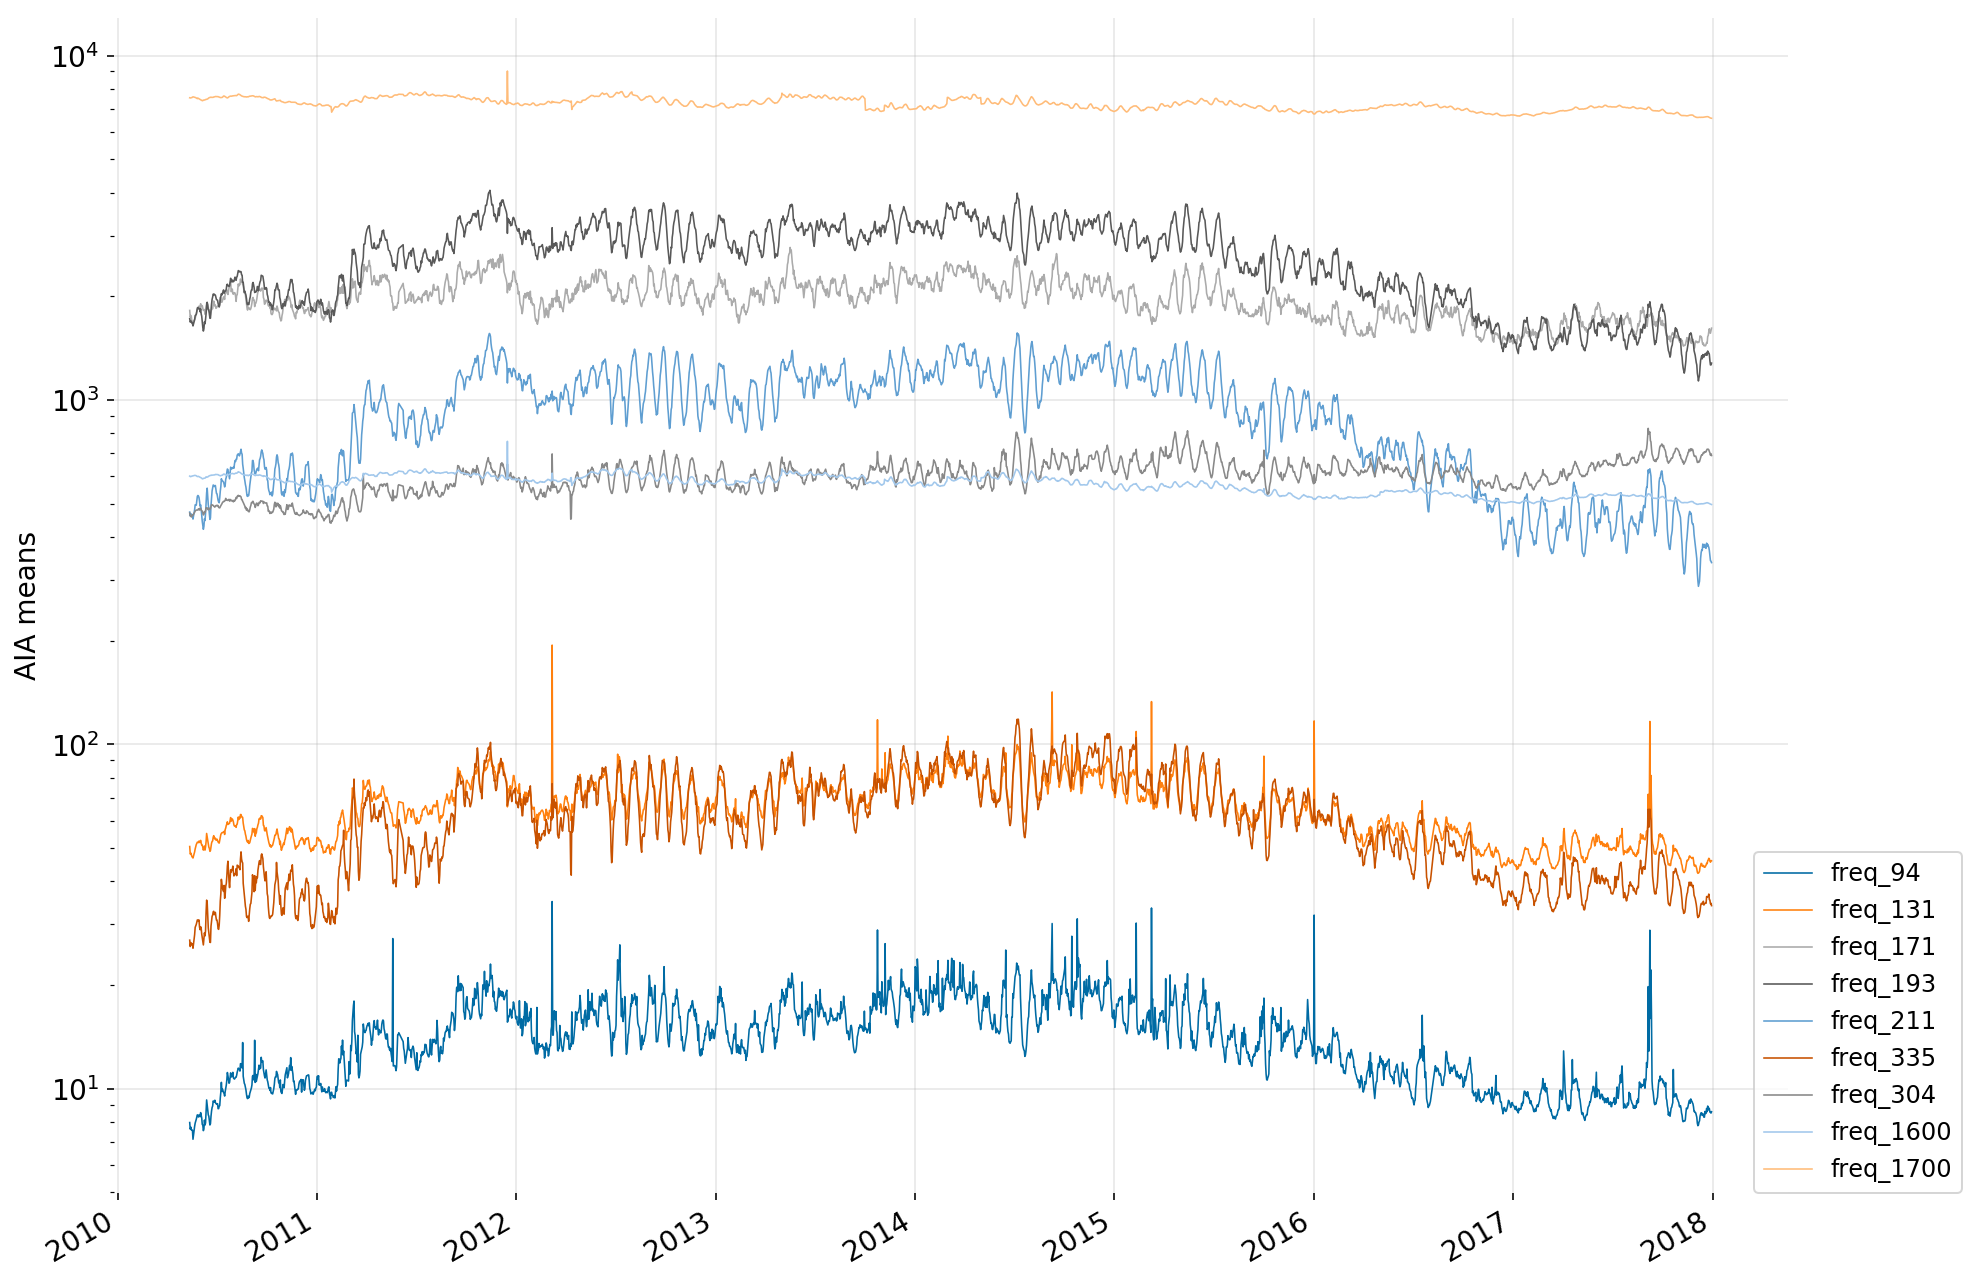

In [9]:
fig,ax = plt.subplots(figsize=(15,12))
aia_means.plot(ax=ax, alpha=1.0, lw=0.8, logy=True, legend=False)
ax.set_ylabel('AIA means', fontsize=14)
ax.set_xlabel('')
ax.grid(alpha=0.3)
ax.legend(loc=(0.98,0), fontsize=12)
plt.savefig('figures/aia_means_non_corrupt.pdf');

## Example of corrupt AIA observations

In [4]:
aia = pd.read_csv('{}/aia_with_corrections.csv'.format(csv_path), index_col='date_obs')
aia.index =  pd.to_datetime(aia.index)

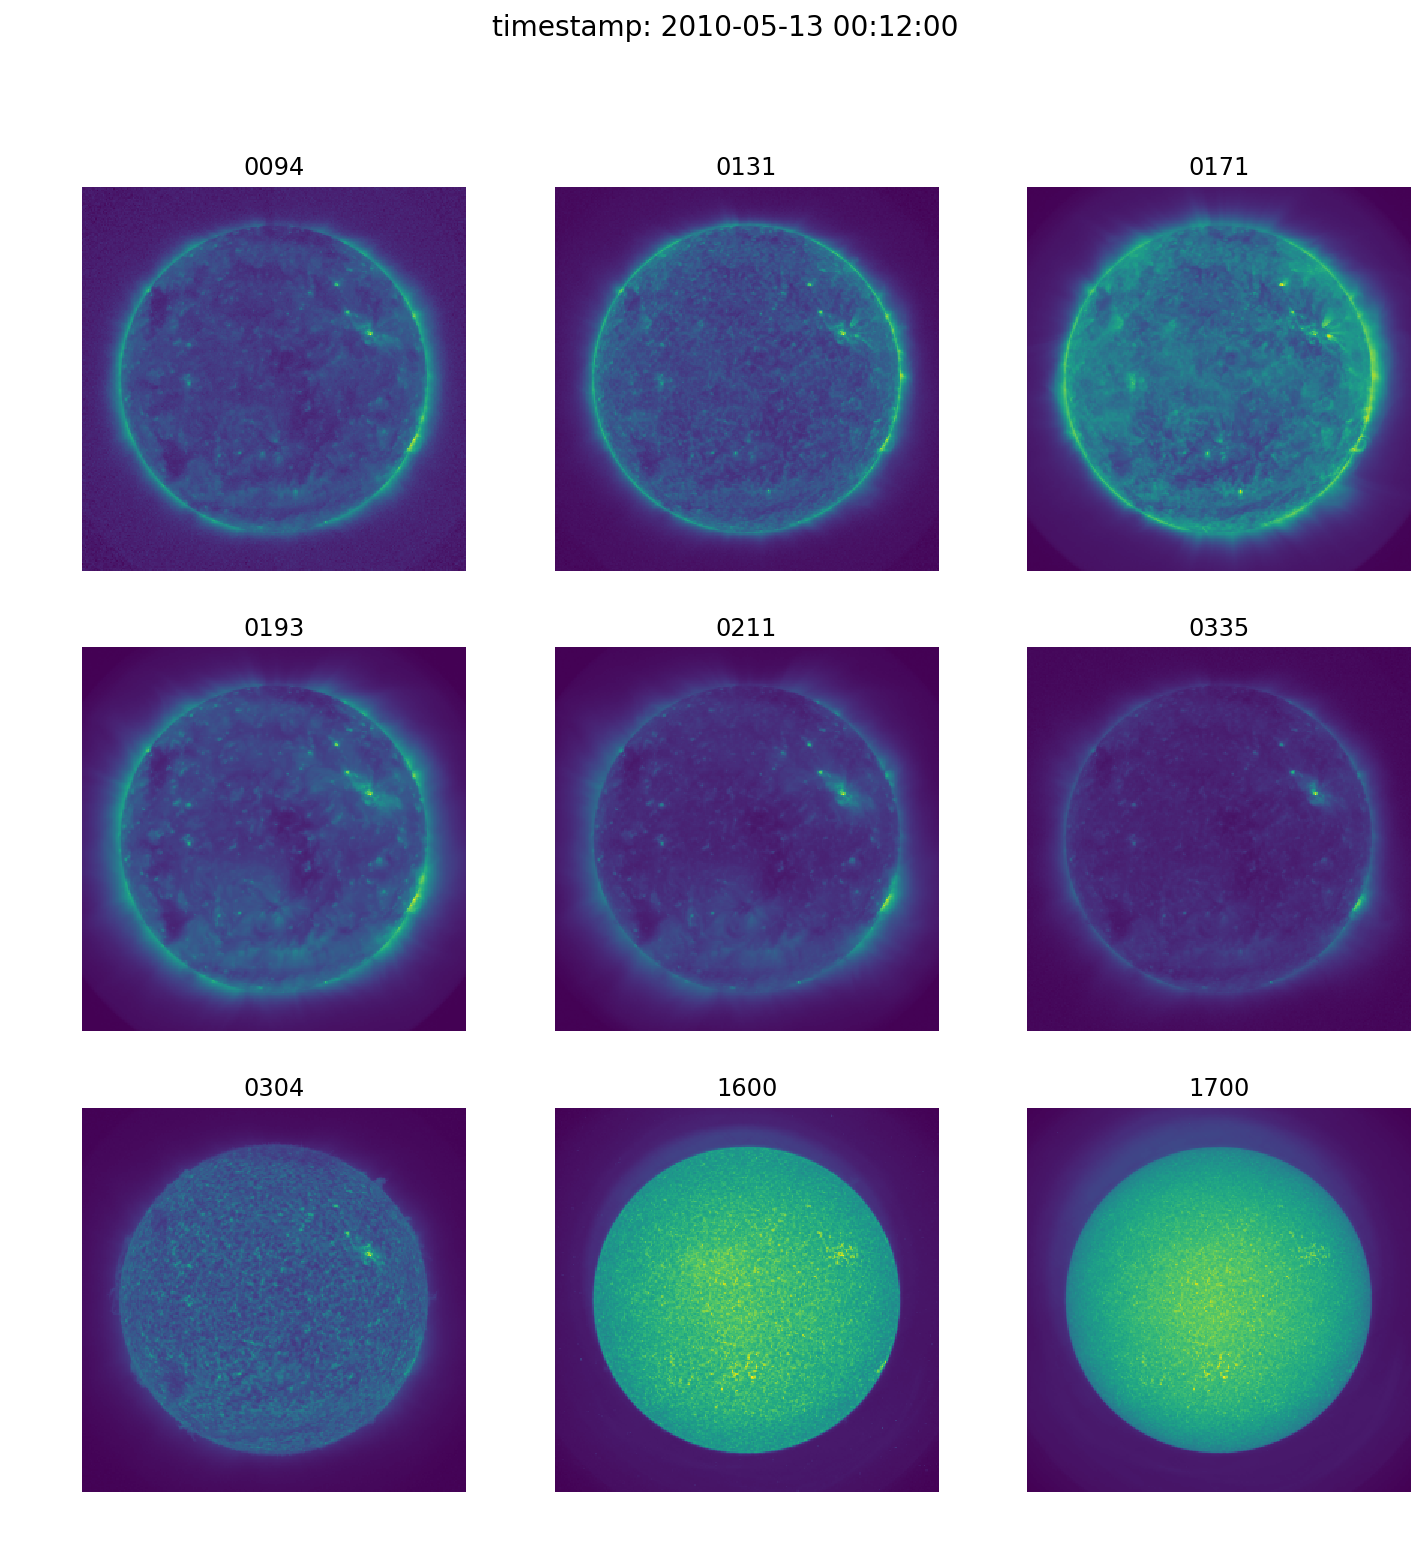

In [17]:
event_time = '2010-05-13 00:12:00'
event_of_interest = aia.loc[event_time:event_time].iloc[0]

fig,ax = plt.subplots(figsize=(4*3,4*3), ncols=3, nrows=3)

for idx, k in enumerate(range(0,9,3)):         
    for l in range(3):
        filename = event_of_interest.iloc[k+l]
        full_path = '{}{}'.format(base, filename)
        
        img = np.load(full_path)['x']
        ax[idx, l].imshow(np.sqrt(img))
        ax[idx, l].set_title(filename.split('_')[2].split('.npz')[0])
        ax[idx, l].grid(False)
        ax[idx, l].set_axis_off()

fig.suptitle('timestamp: {}'.format(event_time), fontsize=14)
plt.savefig('figures/good_aia.pdf')

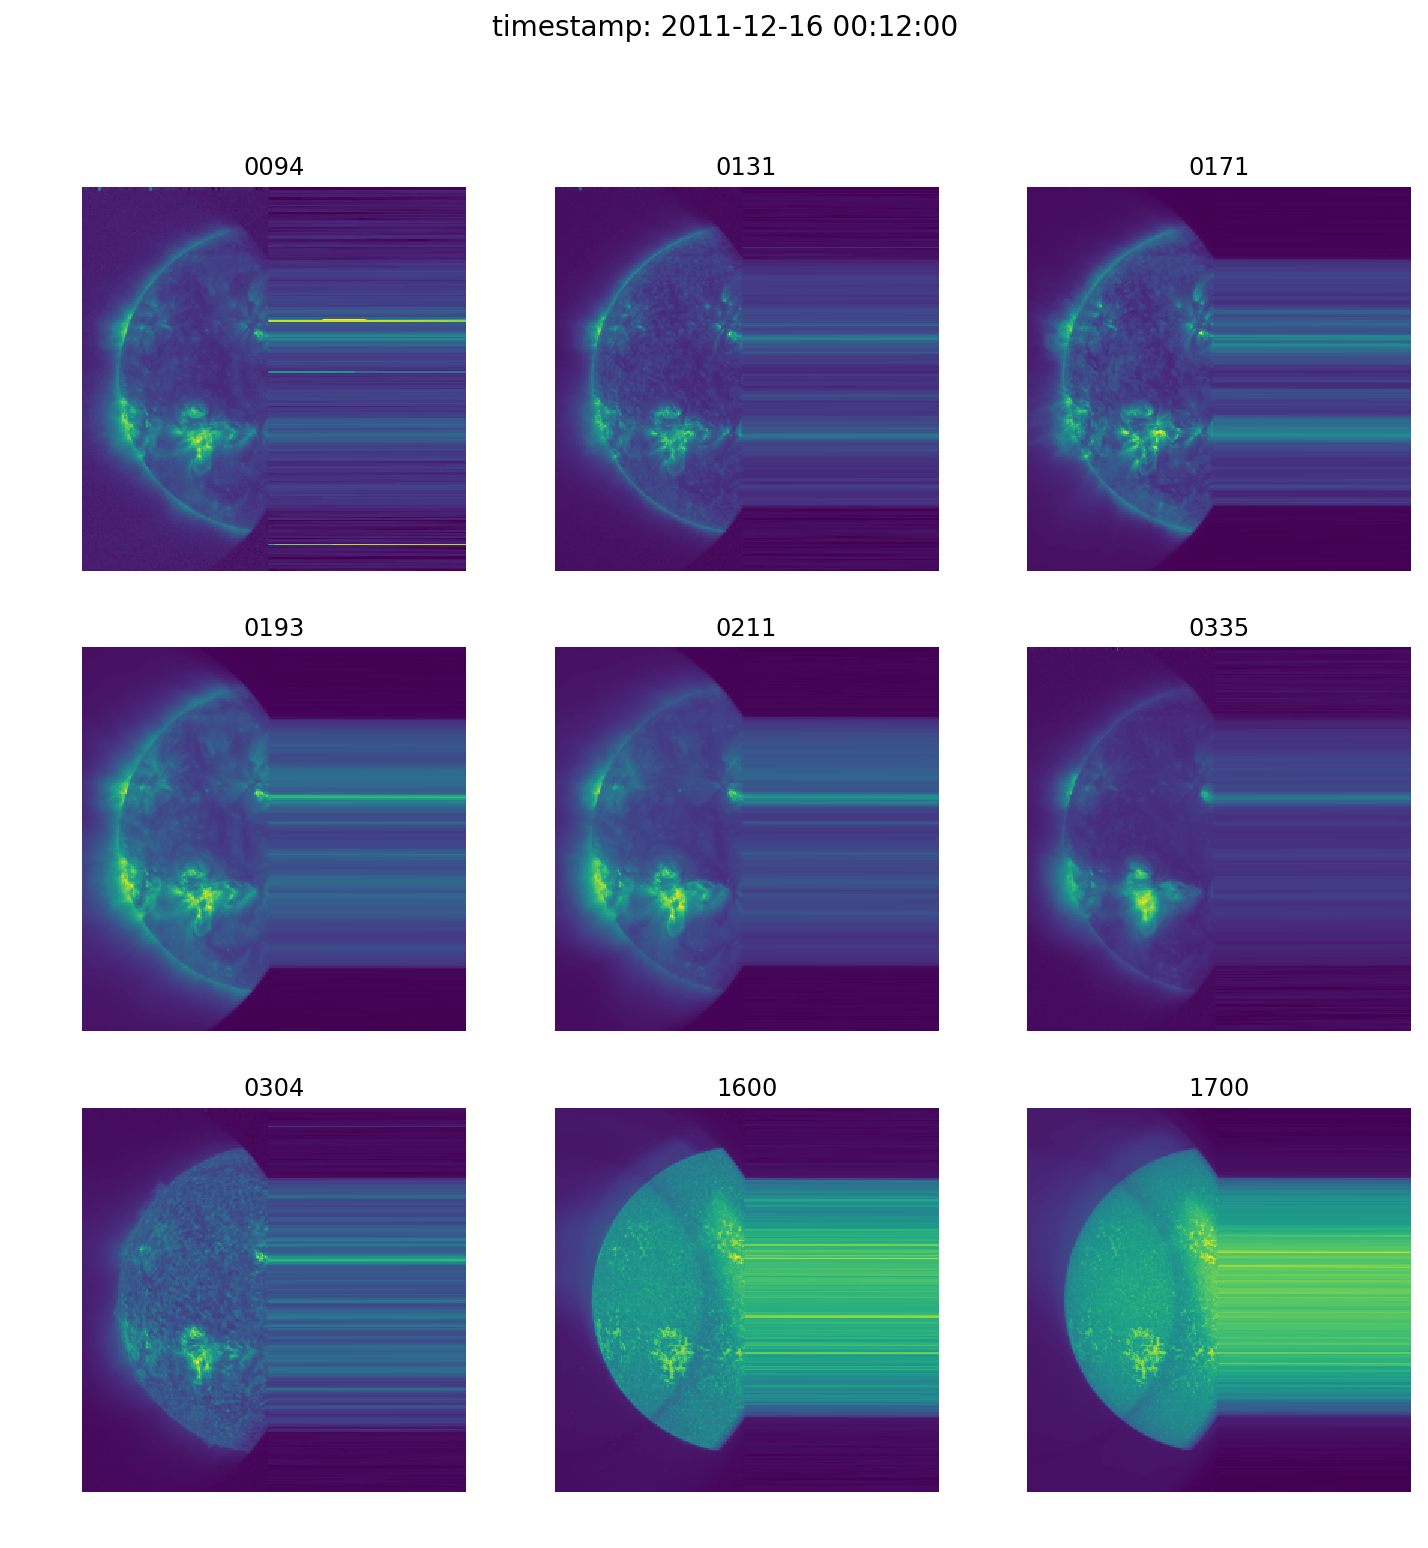

In [14]:
event_time = '2011-12-16 00:12:00'
event_of_interest = aia.loc[event_time:event_time].iloc[0]

fig,ax = plt.subplots(figsize=(4*3,4*3), ncols=3, nrows=3)

for idx, k in enumerate(range(0,9,3)):         
    for l in range(3):
        filename = event_of_interest.iloc[k+l]
        full_path = '{}{}'.format(base, filename)
        
        img = np.load(full_path)['x']
        ax[idx, l].imshow(np.sqrt(img))
        ax[idx, l].set_title(filename.split('_')[2].split('.npz')[0])
        ax[idx, l].grid(False)
        ax[idx, l].set_axis_off()

fig.suptitle('timestamp: {}'.format(event_time), fontsize=14)
plt.savefig('figures/poor_aia.pdf')

# Other visualizations

### AIA 304 waveband monthly average animation

![alt text](animated.gif "Title")

![alt text](2011_avg.png "Title")